
**MONITORING AND REPORTING WORKPLACE SAFETY VIOLATIONS**



In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="I4IhtORK3RnqtOdX7RJd")
project = rf.workspace("mohamed-traore-2ekkp").project("ppe-detection-l80fg")
version = project.version(5)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE-Detection-5 in yolov5pytorch:: 100%|██████████| 61834/61834 [00:08<00:00, 7317.26it/s]


In [ ]:
import os
import shutil
import random

# Paths
base_dir = "/content/PPE-Detection-5"
sample_dir = "/content/ppe_sample"
image_dir = os.path.join(base_dir, "train", "images")
label_dir = os.path.join(base_dir, "train", "labels")

# Sample size
sample_size = 1000


In [ ]:
# Create folders
os.makedirs(os.path.join(sample_dir, "images", "train"), exist_ok=True)
os.makedirs(os.path.join(sample_dir, "labels", "train"), exist_ok=True)

# Sample
images = os.listdir(image_dir)
sampled_images = random.sample(images, sample_size)

for img_file in sampled_images:
    label_file = img_file.replace(".jpg", ".txt").replace(".png", ".txt")

    shutil.copy(os.path.join(image_dir, img_file), os.path.join(sample_dir, "images", "train", img_file))
    shutil.copy(os.path.join(label_dir, label_file), os.path.join(sample_dir, "labels", "train", label_file))


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17413, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 17413 (delta 64), reused 22 (delta 22), pack-reused 17327 (from 4)
Receiving objects: 100% (17413/17413), 16.30 MiB | 16.96 MiB/s, done.
Resolving deltas: 100% (11935/11935), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s e

In [ ]:
yaml_content = """
train: /content/ppe_sample/images/train
val: /content/PPE-Detection-5/valid/images

nc: 8
names: ['glove', 'goggles', 'helmet', 'mask', 'no_glove', 'no_goggles', 'no_helmet', 'no_mask']
"""

with open("/content/ppe_sample.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 15 \
  --data /content/ppe_sample.yaml \
  --weights yolov5s.pt \
  --project ppe_train \
  --name exp_sampled \
  --save-period 1


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-03 05:00:22.325730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746248422.658805    3972 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746248422.739208    3972 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [ ]:
!python detect.py \
  --weights ppe_train/exp_sampled/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/PPE-Detection-5/test/images/005353_jpg.rf.c1de8a1f118a8df51223a8cac0c9676a.jpg


detect: weights=['ppe_train/exp_sampled/weights/best.pt'], source=/content/PPE-Detection-5/test/images/005353_jpg.rf.c1de8a1f118a8df51223a8cac0c9676a.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/PPE-Detection-5/test/images/005353_jpg.rf.c1de8a1f118a8df51223a8cac0c9676a.jpg: 640x640 1 helmet, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 173.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/d

In [ ]:
!python detect.py --weights ppe_train/exp_sampled/weights/best.pt --img 640 --conf 0.25 --source /content/PPE-Detection-5/test/images/005353_jpg.rf.c1de8a1f118a8df51223a8cac0c9676a.jpg


detect: weights=['ppe_train/exp_sampled/weights/best.pt'], source=/content/PPE-Detection-5/test/images/005353_jpg.rf.c1de8a1f118a8df51223a8cac0c9676a.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/PPE-Detection-5/test/images/005353_jpg.rf.c1de8a1f118a8df51223a8cac0c9676a.jpg: 640x640 1 helmet, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 130.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/d

In [ ]:
!ls runs/detect/exp


005353_jpg.rf.c1de8a1f118a8df51223a8cac0c9676a.jpg


In [ ]:
!python detect.py \
  --weights ppe_train/exp_sampled/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/PPE-Detection-5/train/images/0009S6815V3PEU1N-C123-F4_jpg.rf.0b893033824cb7311be47b2bffdf673e.jpg


detect: weights=['ppe_train/exp_sampled/weights/best.pt'], source=/content/PPE-Detection-5/train/images/0009S6815V3PEU1N-C123-F4_jpg.rf.0b893033824cb7311be47b2bffdf673e.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/PPE-Detection-5/train/images/0009S6815V3PEU1N-C123-F4_jpg.rf.0b893033824cb7311be47b2bffdf673e.jpg: 640x640 3 masks, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 189.8ms NMS per image at shape (1,

In [ ]:
from google.colab import files
files.download('ppe_train/exp_sampled/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('ppe_train/exp_sampled/weights/last.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python detect.py \
  --weights ppe_train/exp_sampled/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/test_image.jpg

detect: weights=['ppe_train/exp_sampled/weights/best.pt'], source=/content/test_image.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test_image.jpg: 448x640 1 helmet, 46.9ms
Speed: 0.7ms pre-process, 46.9ms inference, 170.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


GAN


In [ ]:
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd /content/Real-ESRGAN
!pip install -r requirements.txt
!python setup.py develop
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.5/RealESRGAN_x4plus.pth -P weights


fatal: destination path 'Real-ESRGAN' already exists and is not an empty directory.
/content/Real-ESRGAN
/usr/local/lib/python3.11/dist-packages/setuptools/__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:761: SetuptoolsDeprecationWarning: License classifiers are deprecated.
!!

        ********************************************************************************
        Please consider removing the following classifiers in favor of a SPDX license expression:

        License :: OSI Approved :: Apache Software License



In [ ]:
import os
input_folder = "/content/ppe_sample/images/train"
output_folder = "/content/esrgan_output"

os.makedirs(output_folder, exist_ok=True)


In [ ]:
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.0.1
Uninstalling torch-2.0.1:
  Successfully uninstalled torch-2.0.1
Found existing installation: torchvision 0.15.2
Uninstalling torchvision-0.15.2:
  Successfully uninstalled torchvision-0.15.2
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [ ]:
!pip install numpy==1.24.4 --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 110.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.63 requires idna==3.7, but you have idna 3.10 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
t

In [ ]:
!pip install torch==2.0.0 torchvision==0.15.1 torchaudio==2.0.0


Reason for being yanked: Contains an incorrect torch dependency
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 43.9 MB/s eta 0:00:00


In [ ]:
!python inference_realesrgan.py \
    -n RealESRGAN_x4plus \
    -i /content/ppe_sample/images/train \
    -o /content/esrgan_output \
    --outscale 4


/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100% 63.9M/63.9M [00:00<00:00, 302MB/s]
Testing 0 0009S6815V3PEU1N-C123-F4_jpg.rf.4a7949b02885f4bdbba9504e94ee693f
Testing 1 002_1024_jpeg_jpg.rf.626da7b9d56826e1565f9d7666e1b94e
Testing 2 004_1024_jpeg_jpg.rf.4d0d82293a2179eda97a0928f21c11d9
Testing 3 005362_jpg.rf.bd3f1b93c5bd3d5ffcfd57a256ae7da5
Testing 4 005367_jpg.rf.7bb3171324c931aac66e3869039d63a3
Testing 5 005374_jpg.rf.41288338a832a36a239d2886e7077edf
Testing 6 005380_jpg.rf.b25d98b68a9d664bfc05557e8e4075c0
Testing 

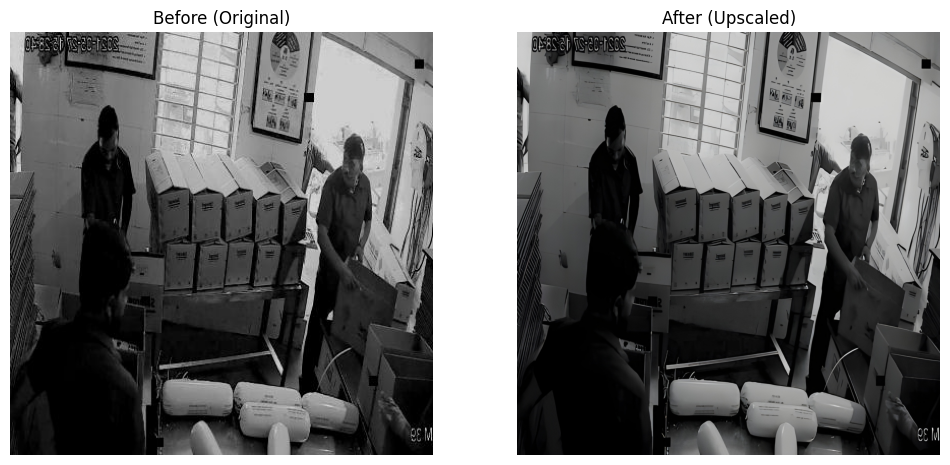

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Choose a sample output image from the output folder
output_filename = 'packing1033_jpg.rf.3f9b294fb798ec34ae9fe5d8cbcb334c_out.jpg'

# Derive original filename by removing '_out' before .jpg
original_filename = output_filename.replace('_out.jpg', '.jpg')

# Define paths
before_path = os.path.join('/content/ppe_sample/images/train', original_filename)
after_path = os.path.join('/content/esrgan_output', output_filename)

# Load images
before_img = Image.open(before_path)
after_img = Image.open(after_path)

# Plot side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Before (Original)")
plt.imshow(before_img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("After (Upscaled)")
plt.imshow(after_img)
plt.axis("off")

plt.show()


In [ ]:
import os

# List files generated by ESRGAN
output_files = os.listdir('/content/esrgan_output')
print(f"Total images processed: {len(output_files)}")
print("Some sample output files:")
print(output_files[:5])


Total images processed: 1000
Some sample output files:
['packing1033_jpg.rf.3f9b294fb798ec34ae9fe5d8cbcb334c_out.jpg', 'nglovpp3137_jpg.rf.2f939f73433f6f7fbee148347ebbc98b_out.jpg', 'img250_jpg.rf.e2768b3639ad86f2469bb2890ffdf38d_out.jpg', 'PP02img540_jpg.rf.28ad2760f4142ad55b587dbd74daad2f_out.jpg', 'Inside-merge_mov-21_jpg.rf.c3aa58dad82eec1b370d9814417e9bc7_out.jpg']


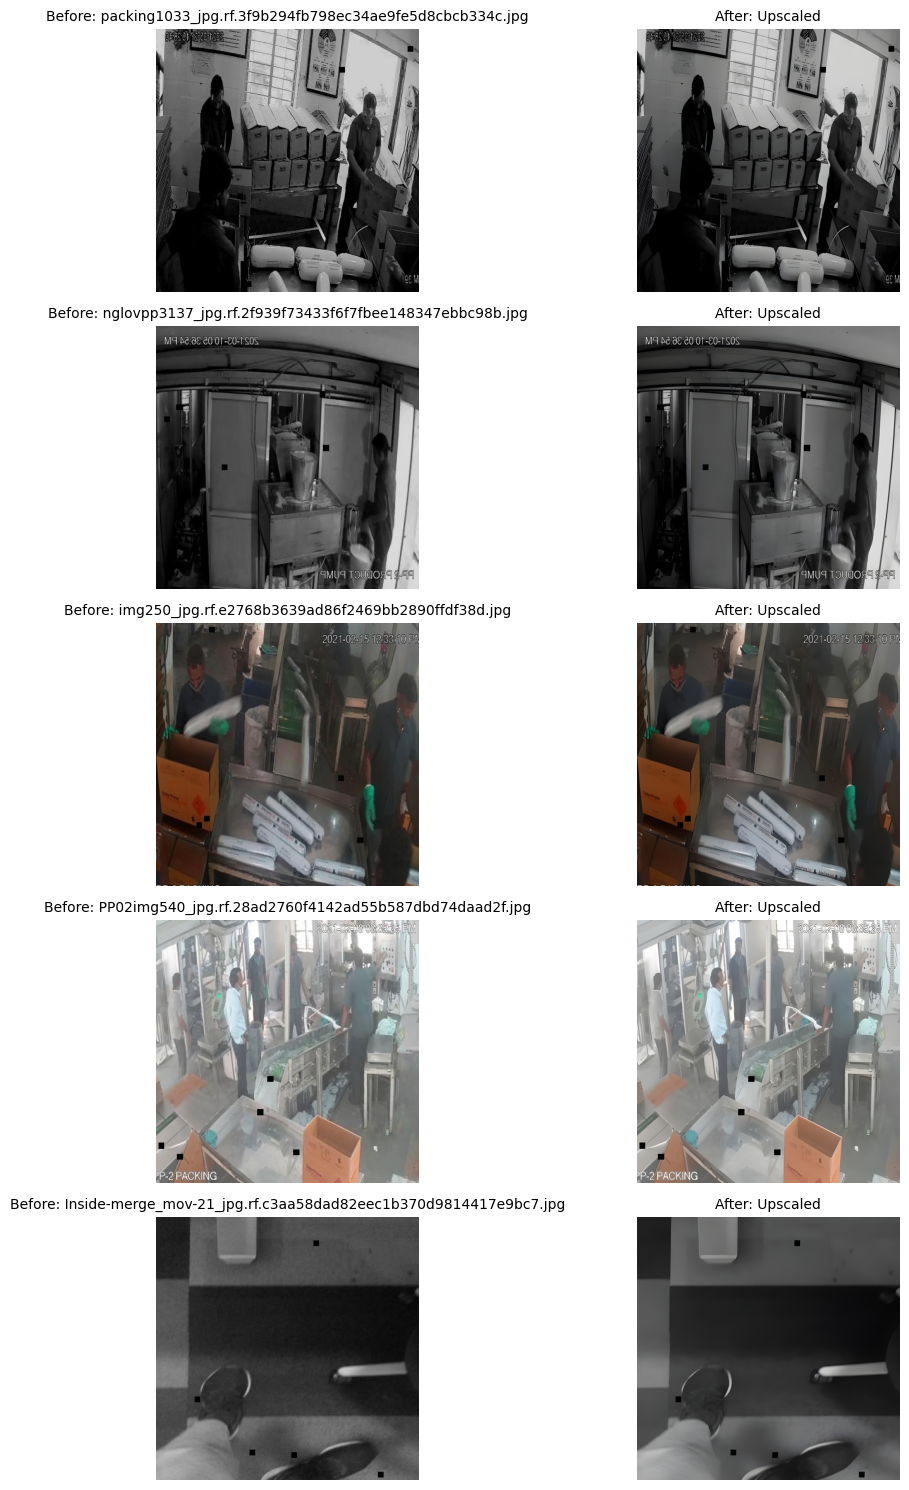

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Sample upscaled filenames
output_files = [
    'packing1033_jpg.rf.3f9b294fb798ec34ae9fe5d8cbcb334c_out.jpg',
    'nglovpp3137_jpg.rf.2f939f73433f6f7fbee148347ebbc98b_out.jpg',
    'img250_jpg.rf.e2768b3639ad86f2469bb2890ffdf38d_out.jpg',
    'PP02img540_jpg.rf.28ad2760f4142ad55b587dbd74daad2f_out.jpg',
    'Inside-merge_mov-21_jpg.rf.c3aa58dad82eec1b370d9814417e9bc7_out.jpg'
]

before_dir = '/content/ppe_sample/images/train'
after_dir = '/content/esrgan_output'

# Set up plot
plt.figure(figsize=(12, len(output_files) * 3))
for i, out_file in enumerate(output_files):
    orig_file = out_file.replace('_out.jpg', '.jpg')
    before_path = os.path.join(before_dir, orig_file)
    after_path = os.path.join(after_dir, out_file)

    # Load images
    try:
        before_img = Image.open(before_path)
        after_img = Image.open(after_path)
    except FileNotFoundError:
        continue  # Skip if any image is missing

    # Show before
    plt.subplot(len(output_files), 2, i * 2 + 1)
    plt.imshow(before_img)
    plt.title(f"Before: {orig_file}", fontsize=10)
    plt.axis("off")

    # Show after
    plt.subplot(len(output_files), 2, i * 2 + 2)
    plt.imshow(after_img)
    plt.title("After: Upscaled", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
files.download('/content/Real-ESRGAN/weights/RealESRGAN_x4plus.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>